<a href="https://colab.research.google.com/github/troymerales/python-notebooks-nm/blob/main/Root_finding_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Root-finding Methods
This notebook showcases four different methods in estimating nonlinear equations: **Nonlinear MOSS**, **Newton-Raphson**, **False-Position**, and **Secant Method**.

## Nonlinear Method of Successive Substitution (MOSS)
The nonlinear MOSS or fixed-point iteration method is a basic numerical method for solving nonlinear equations by turning them into a fixed-point form and iterating. It's simple but only converges under specific conditions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def nonlinearMOSS(f, x0, tol, numiter):
    n = len(f)
    x = np.copy(x0)
    path = [x0.flatten().copy()]
    counter = 1
    while counter <= numiter:
        for i in range(n):
            x[i] = f[i](*x)
        path.append(x.flatten().copy())
        if np.linalg.norm(x - x0) / np.linalg.norm(x) < tol:
            return x, counter, path
        else:
            counter += 1
            x0 = np.copy(x)
    return x, counter, path

To test the code, we have the following functions to define: \\
\
$\hspace{1.5em} f_1:\frac{1}{3}\left(\cos(x_1x_2)+\frac{1}{2}\right)$ \\
$\hspace{1.5em} f_2: \sqrt{\frac{1}{81}\left(x_1^2+\sin(x_3)+1.06\right)}-0.1$ \\
$\hspace{1.5em} f_3: \frac{1}{20}\left(-e^{-x_1x_2}-\frac{10\pi-3}{3}\right)$ \\
\
$\hspace{1.5em} g_1: \sqrt{x+0.75-y}$ \\
$\hspace{1.5em} g_2: \frac{x^2}{1+5x}$

In [ ]:
f1 = lambda x1,x2,x3: (np.cos(x1*x2) + (1/2))/3
f2 = lambda x1,x2,x3: np.sqrt((x1**2 + np.sin(x3) + 1.06)/81)-0.1
f3 = lambda x1,x2,x3: (-np.exp(-x1*x2) - ((10*np.pi - 3)/3))/20
f = [f1,f2,f3]

g1 = lambda x,y: np.sqrt(x + 0.75 -y)
g2 = lambda x,y: (x**2)/(1+5*x)
g = [g1,g2]

Applying Nonlinear MOSS, we have

In [ ]:
x0=np.array([[0.1],[0.2],[0.3]])
x, iter, path = nonlinearMOSS(f, x0, 1e-12, 100)

In [ ]:
for i in range(3):
  print(f[i](*x))

[0.5]
[0.]
[-0.52359878]


In [ ]:
y0 = np.array([[0.1], [0.2]])
y, iter, path = nonlinearMOSS(g, y0, 1e-12, 100)


In [ ]:
print("x1 = ", g[0](*y))
print("x2 = ", g[1](*y))

x1 =  [1.37206541]
x2 =  [0.23950193]


To visualize this we have the following graph:

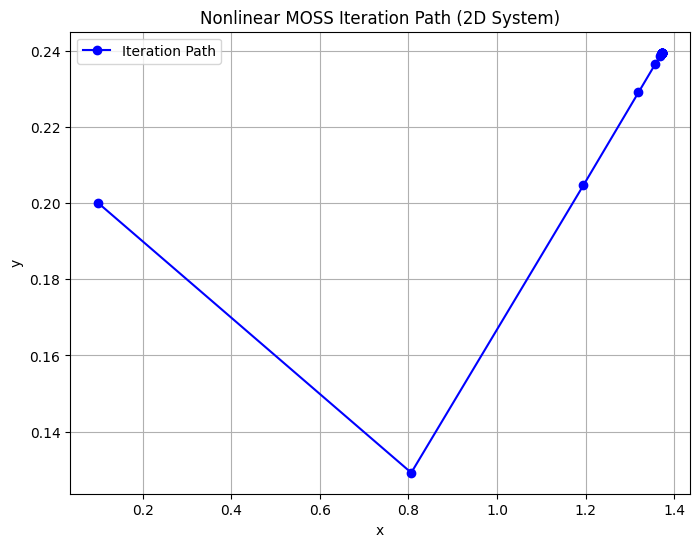

In [ ]:
path=np.array(path)
plt.figure(figsize=(8,6))
plt.plot(path[:,0], path[:,1], 'o-', label='Iteration Path', color='blue')
plt.title("Nonlinear MOSS Iteration Path (2D System)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

#Newton-Raphson
The Newton-Raphson Method is one of the fastest and most powerful techniques for finding roots of nonlinear equations. The method starts with an initial guess $x_0$, and repeatedly apply the formula until the solution converges (i.e., until the change is small enough).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newtonRaphson(f, f_prime, x0, tol, numiter):
    steps = [x0]
    for i in range(1, numiter + 1):
        x = x0 - f(x0) / f_prime(x0)
        steps.append(x)

        if abs(f(x)) < tol:
            return x, i, steps

        x0 = x

    print(f"The method failed after {numiter} iterations")
    return None, numiter, steps

Given the function \\
$\hspace{1.5em} f(x)=5x^3-x^2+6x-2$ \\
and its derivative \\
$\hspace{1.5em} f'(x)=15x^2-2x+6$ \\
and an initial guess $x_0=0.5$ with a tolerance of $10^{-8}$,

In [ ]:
f = lambda x: 5*x**3 - x**2 + 6*x - 2
f_prime = lambda x: 15*x**2 - 2*x + 6

x0 = 0.5
tol = 1e-8
numiter = 50

We now apply Newton-Raphson method, showing $x$ as well as the number of iterations until it converges.

In [ ]:
root, iters, steps = newtonRaphson(f, f_prime, x0, tol, numiter)
print("Root:", root)
print("Iterations:", iters)

Root: 0.3226874214710337
Iterations: 4


To visualze this, we have the following graph:

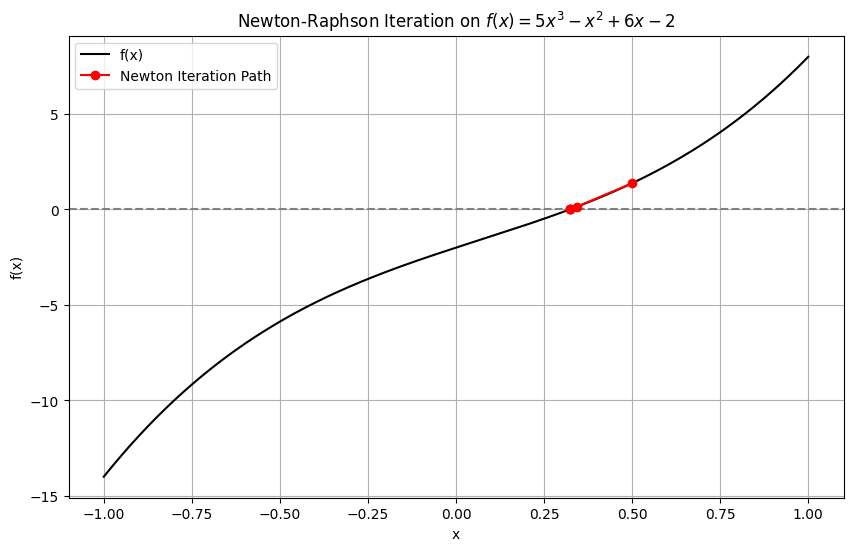

In [ ]:
x_vals = np.linspace(-1, 1, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='black')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(steps, [f(x) for x in steps], 'ro-', label='Newton Iteration Path')
plt.title("Newton-Raphson Iteration on $f(x) = 5x^3 - x^2 + 6x - 2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

#False Position
The False Position Method, or Regula Falsi, is a root-finding algorithm for solving nonlinear equations of the form $f(x)=0$. Given two points $x_u$ and $x_l$, such that $f(x_u)f(x_l)<0$,
we estimate the root $x_r$ as the $x$-intercept of the line connecting $(x_u,f(x_u))$ and $x_l,f(x_l)$. \\

$\hspace{1.5em} x_r=x_l-\frac{f(x_l)(x_l-x_u)}{f(x_l)-f(x_u)}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def falsePosition(xl, xu, tol, numiter=50):
    xr = xl
    ea = 100
    steps = []

    for i in range(1, numiter + 1):
        xr_prev = xr
        xr = xu - (f(xu) * (xl - xu)) / (f(xl) - f(xu))
        steps.append(xr)

        if i > 1:
            ea = abs((xr - xr_prev) / xr) * 100

        if f(xl) * f(xr) < 0:
            xu = xr
        elif f(xr) * f(xu) < 0:
            xl = xr
        else:
            print(f"The method failed after {numiter} iterations")
            break

        if ea < tol:
            break

    return xr, i, ea, steps

Given the function $f(x)=e^x+2^{-x}+2\cos(x)-6$,
with \\
$x_l=1$, $x_u=2$, $\text{tol}=10^-12$,

In [ ]:
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
xl = 1
xu = 2
tolerance = 1e-12

Applying False Position method and showing the root, iterations, and final error,

In [ ]:
root, iterations, final_error, steps = falsePosition(xl, xu, tolerance)
print("Root: ", float(root))
print("Iterations: ", iterations)
print("Final Error: ", final_error)

Root:  1.8293836019338474
Iterations:  17
Final Error:  5.34057625004046e-13


To visualize this, we have the following graph:

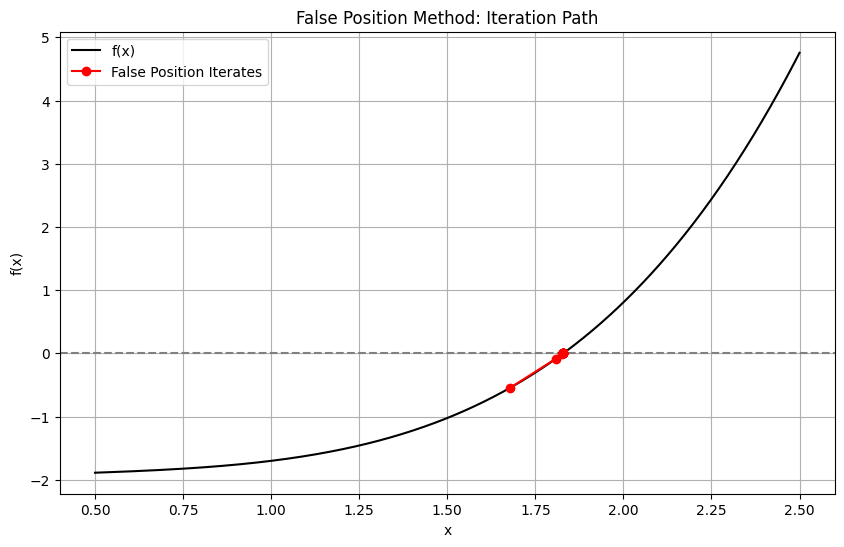

In [ ]:
x_vals = np.linspace(0.5, 2.5, 500)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='black')
plt.axhline(0, color='gray', linestyle='--')

plt.plot(steps, [f(x) for x in steps], 'ro-', label='False Position Iterates')

plt.title("False Position Method: Iteration Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

#Secant Method
The Secant Method is the same with the Newton-Raphson method, but does not require the derivative of the function. Instead, it approximates the derivative using two previous values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def secant(x0, x1, f, tol=1e-10, max_iter=100):
    steps = [x0, x1]
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if f_x1 - f_x0 == 0:
            print("Division by zero!")
            return None, steps
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        steps.append(x2)
        if abs(f(x2)) < tol:
            return x2, steps
        x0, x1 = x1, x2
    print("Did not converge")
    return None, steps

Given the function $x^2-2$,

In [ ]:
f = lambda x: x**2 - 2

Applying Secant Method, we have,

In [ ]:
root, steps = secant(1, 2, f)
print("Root:", root)


Root: 1.4142135623730954


To visualize this, we have the following graph:

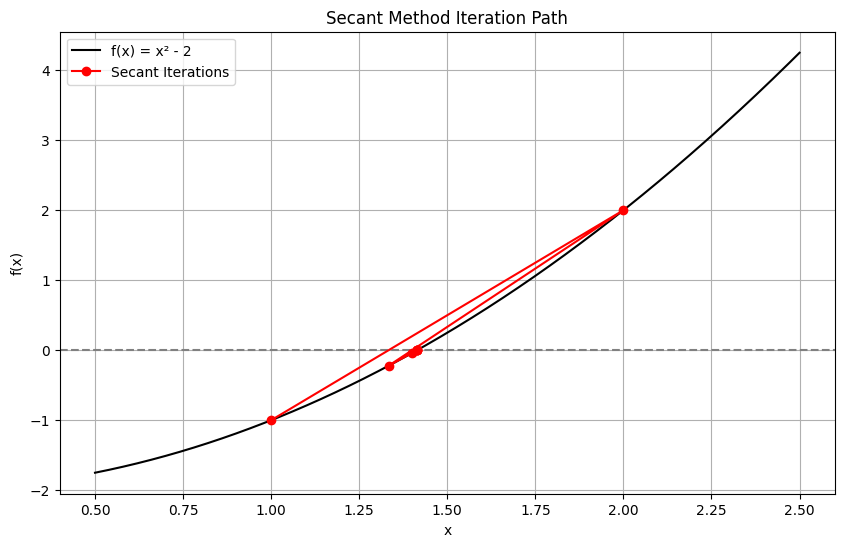

In [ ]:
x_vals = np.linspace(0.5, 2.5, 500)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x² - 2', color='black')
plt.axhline(0, color='gray', linestyle='--')

plt.plot(steps, [f(x) for x in steps], 'ro-', label='Secant Iterations')

plt.title("Secant Method Iteration Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()